In [1]:
import os
import numpy as np

try:
    os.makedirs("fake_files")
except:
    pass

for idx in range(10000):
    fname = "fake_files/file_{}.npy".format(idx)
    if not os.path.exists(fname):
        np.save(fname, np.random.normal(size=100000))  

# Diseño de software para cómputo científico

---
## Unidad 4: Optimización, paralelismo, concurrencia y cómputo distribuido en alto nivel.

## Agenda de la Unidad 4

- **Multithreading, Paralelismo, Concurrencia.**
- Optimización y Optimización prematura. Cuellos de botella, Legibilidad vs. Optimización.
- Profiling.
- Compiladores justo a tiempo (numba).
- Cómputo distribuido con Dask.

## Concurrencia 

> se refiere a la habilidad de distintas partes de un programa, algoritmo, o problema de ser ejecutado en desorden o en orden parcial, sin afectar el resultado final. 

> Los cálculos (operaciones) pueden ser ejecutados en múltiples procesadores, o ejecutados en procesadores separados físicamente o virtualmente en distintos hilos de ejecución. 

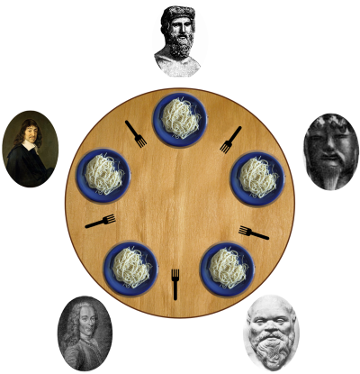

## Hilos vs Procesos

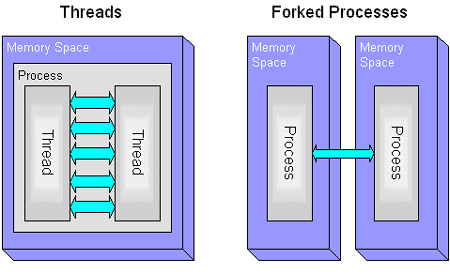

- **Hilos:**
    - Se ejecutan en el mismo proceso.
    - Comparten memoria.
- **Procesos:**
    - **NO** comparten memoria.
    - Pueden ejecutarse en diferentes procesadores.

## Qué es un sistema operativo?

Es una **colección** de programas que funciona como:

- **Una máquina extendida** (top-down): Es una abstracción sobre el hardware.
- **Un manejador de recursos** (bottom-up): Un proveedor de servicios solicitados por el software.

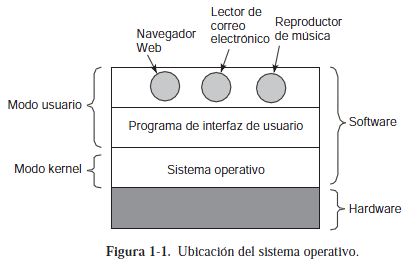

## Si nos centramos en el kernel

Linux tiene estos subsistemas

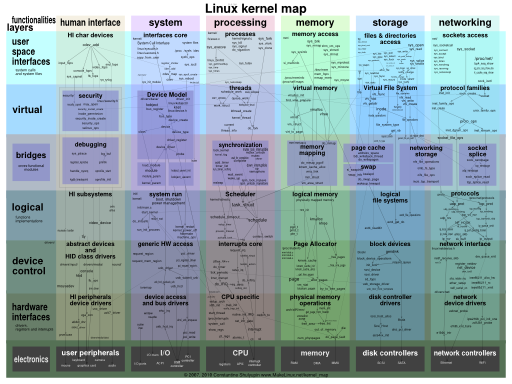

https://www.makelinux.net/kernel_map/

## Llamadas al sistema

- Es el mecanismo usado por una aplicación para solicitar un servicio al sistema operativo.

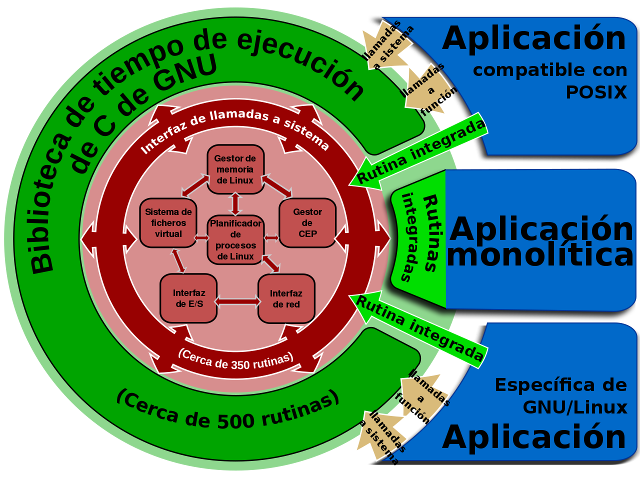

## Interrupción

Es una señal recibida por el procesador de una computadora, para indicarle que debe «interrumpir» el curso de ejecución actual y pasar a ejecutar código específico para tratar esta situación.

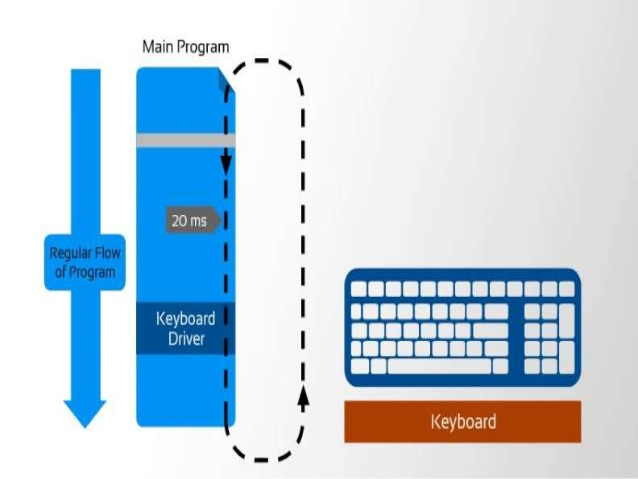

## Python - Multithreaded Programming

Es **similar** a ejecutar varios programas diferentes al mismo tiempo, pero con los siguientes beneficios:

- Comparten el mismo espacio de datos con el subproceso principal y, por lo tanto, pueden compartir información o comunicarse entre ellos fácilmente.
- No requieren mucha sobrecarga de memoria; son más baratos que los procesos.

**Problema:** EL &Ç@$!! GIL

## Global interpreter lock (GIL)

- Es un mecanismo utilizado en los intérpretes de lenguaje de computadora para sincronizar la ejecución de threads para que solo **un** subproceso nativo pueda ejecutarse a la vez.  

**Pero... WHY?**

- Mayor velocidad de los programas de un solo subproceso (no es necesario adquirir o liberar bloqueos en todas las estructuras de datos por separado).
- Fácil integración de bibliotecas C que generalmente no son seguras para subprocesos,
- Facilidad de implementación.


## Python `threading`

Vamos con un ejemplo secuencial

In [2]:
import numpy as np

In [3]:
%%time

def sts(name, nums, verbose=True):
    mean, std = np.mean(nums), np.std(nums)
    if verbose:
        print("Name {}".format(name))
        print("\t Mean {}".format(mean))
        print("\t Std {}".format(std))
    
for idx in range(10):
    name = "F{}".format(idx)
    nums = np.random.normal(size=1000)
    sts(name, nums, False)

CPU times: user 3 ms, sys: 0 ns, total: 3 ms
Wall time: 2.26 ms


## Python `threading`

In [4]:
import numpy as np
import threading

class MyThread(threading.Thread):
    def __init__(self, name, nums):
        super().__init__()
        self.name = name
        self.nums = nums
        
    def run(self):
        print("Starting ", self.name)
        self.mean = np.mean(self.nums)
        self.std = np.std(self.nums)

## Python `threading`

In [5]:
%%time
threads = []
for tidx in range(10):
    thread = MyThread(
        name="T{}".format(tidx),
        nums=np.random.normal(size=1000))
    
    thread.start()
    threads.append(thread)
    
print("-" * 10)
for thread in threads:
    thread.join()
    print("Thread {}".format(thread.name))
    print("\t Mean {}".format(thread.mean))
    print("\t Std {}".format(thread.std))

Starting  T0
Starting  T1
Starting  Starting T2
 T3
Starting  T4
Starting  Starting  T6
T5
Starting  Starting  T8
T7
Starting ----------
Thread T0
	 Mean 0.0008607679134008848
	 Std 1.0072751789928112
Thread T1
	 Mean -0.03137144129526158
	 Std 1.0513996818423104
Thread T2
	 Mean -0.005252223394447162
	 Std 1.0060131260295315
Thread T3
	 Mean 0.022324047589262454
	 Std 0.9774139330786118
Thread T4
	 Mean -0.02611232998703439
	 Std 1.0181898244144818
 T9
Thread T5
	 Mean 0.007196937224145739
	 Std 0.9575231261741709
Thread T6
	 Mean 0.004959962260695381
	 Std 0.9948191373444224
Thread T7
	 Mean 0.042362917349813796
	 Std 0.985354974533266
Thread T8
	 Mean 0.028342653948070454
	 Std 0.9878525913490604
Thread T9
	 Mean -0.04570367426908072
	 Std 1.0064759206637761
CPU times: user 10.6 ms, sys: 497 µs, total: 11.1 ms
Wall time: 8.82 ms


## Threading que si sirve

In [15]:
%%time

# masomenos 1 min
def open_file(idx):
    fname = "fake_files/file_{}.npy".format(idx)
    with open(fname, "rb") as fp:
        nums = np.load(fp)
    np.mean(nums)
    np.std(nums)
    
for idx in range(10000):
    open_file(idx)

CPU times: user 10.1 s, sys: 8.83 s, total: 18.9 s
Wall time: 1min 25s


In [ ]:
%%time
def open_file(idx):
    fname = "fake_files/file_{}.npy".format(idx)
    with open(fname, "rb") as fp:
        nums = np.load(fp)
    np.mean(nums)
    np.std(nums)

threads = []
for idx in range(10000):
    thread = threading.Thread(target=open_file, kwargs={"idx": idx})
    thread.start()
    threads.append(thread)
    
for thread in threads:
    thread.join()

ZMQError: Too many open files

ZMQError: Too many open files

ZMQError: Too many open files

## Multiprocessing

Es un paquete que admite la generación de procesos utilizando una API similar al módulo de multithreading.

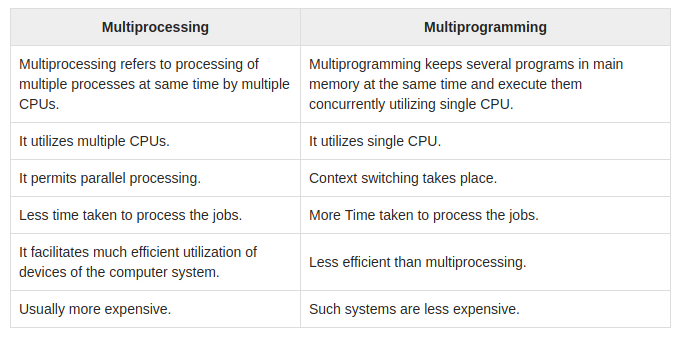

## Multiprocessing

In [1]:
import numpy as np
import multiprocessing as mp

class MyProc(mp.Process):
    def __init__(self, name, nums):
        super().__init__()
        self.name = name
        self.nums = nums
        
    def run(self):
        print("Starting ", self.name)
        self.mean = np.mean(self.nums)
        self.std = np.std(self.nums)

## Multiprocessing

In [4]:
%%time
procs = []
for pidx in range(10):
    proc = MyProc(
        name="P{}".format(pidx),
        nums=np.random.normal(size=1000))
    
    proc.start()
    procs.append(proc)
    
print("-" * 10)
for proc in procs:
    proc.join()
#     print("Proc {}".format(proc.name))
#     print("\t Mean {}".format(proc.mean))
#     print("\t Std {}".format(proc.std))

Starting  P0
Starting  P2
Starting  P1
Starting  P3
Starting  P4
Starting  P5
Starting  P6
Starting  P7
Starting  P8
Starting  P9
----------
Proc P0


AttributeError: 'MyProc' object has no attribute 'mean'

## Referencias

- https://es.wikipedia.org/wiki/Concurrencia_(inform%C3%A1tica)
- http://materias.fi.uba.ar/7508/MOS4/Operating.Systems.4th.Edi.pdf
- https://es.wikipedia.org/wiki/Interrupci%C3%B3n
- https://es.wikipedia.org/wiki/Llamada_al_sistema
- https://www.tutorialspoint.com/python/python_multithreading.htm
- https://docs.python.org/2/library/multiprocessing.html
- https://www.tutorialspoint.com/concurrency_in_python/concurrency_in_python_multiprocessing.htm